# 4.1

In python float values extend through the range of approximatly $10^{308}$ to $-10^{308}$. Going outside of this range results in the 'inf' value.  
The smallest number that can be represented is approximatly $10^{-308}$.  

Integers have unlimited precision (based upon the memory of the computer), so you do not have to worry (as much) about under/overflow. The down side to this is the increased computation costs with larger integers, which can drastically slow dow the program.

# 4.2

Floats only have a decimal precision of 16 significant digits.  
As a result of this I is important to never compare to float values for equality, instead there should exist a range difference that determines if the two numbers are "close enough".

To account for this "close enough" we say the standard deviation is off by an _error constant_ (denoted $C$):  
$\sigma = Cx$

In the case of floats we know $C \approx 10^{-16}$


### Error Propagation:

##### Addition / Subtraction:
$\sigma_{sum}^2 = \sigma_1^2 + \sigma_2^2$

##### Multiplication / Division:
$\frac{\sigma^2}{x^2} = \frac{\sigma_1^2}{x_1^2} + \frac{\sigma_2^2}{x_2^2}$


### Error Propagation (Accounting for _error constant_):

##### Addition / Subtraction:
$\sigma_{sum}^2 = \sigma_1^2 + \sigma_2^2$  
$\sigma_{sum} = C \sqrt{x_1^2 + x_2^2}$

##### Multiplication / Division:
$\frac{\sigma^2}{x^2} = \frac{\sigma_1^2}{x_1^2} + \frac{\sigma_2^2}{x_2^2}$  
$\sigma = \sqrt{2}Cx$

##### Summation of Multiple Values:
$\sigma^2 = \sum_{i=1}^{N} \sigma_i^2 = C^2 \ N \ \overline{x^2}$  
Where $\overline{x^2}$ is the mean-square value of x:  


In [3]:
#showing how to determine if two numbers are "close enough"

epsilon = 1e-12
x = 1.1 + 2.2 #should equal 3.3, but does not!!!!

if abs (x - 3.3) < epsilon:
    print (x)

3.3000000000000003


# Example 4.1

In [5]:
from math import sqrt

x = 1
y = 1 + (1e-14) * sqrt(2)

print ((1e14) * (y - x))
print (sqrt (2))

1.4210854715202004
1.4142135623730951


# Runestone Reading

Files are contained in directories.

Files have specified names that are based upon the filename and the path to the file.

The path to a file can be absolute or relative.  
Absolute paths start from the home directory and follow through each folder up to the specified file.  
Relative paths start from a specific directory and continue into subdirectories or parent directories. You can use ".." to travel to the parent directory of the currently accessed directory.

# Exercise 3.7

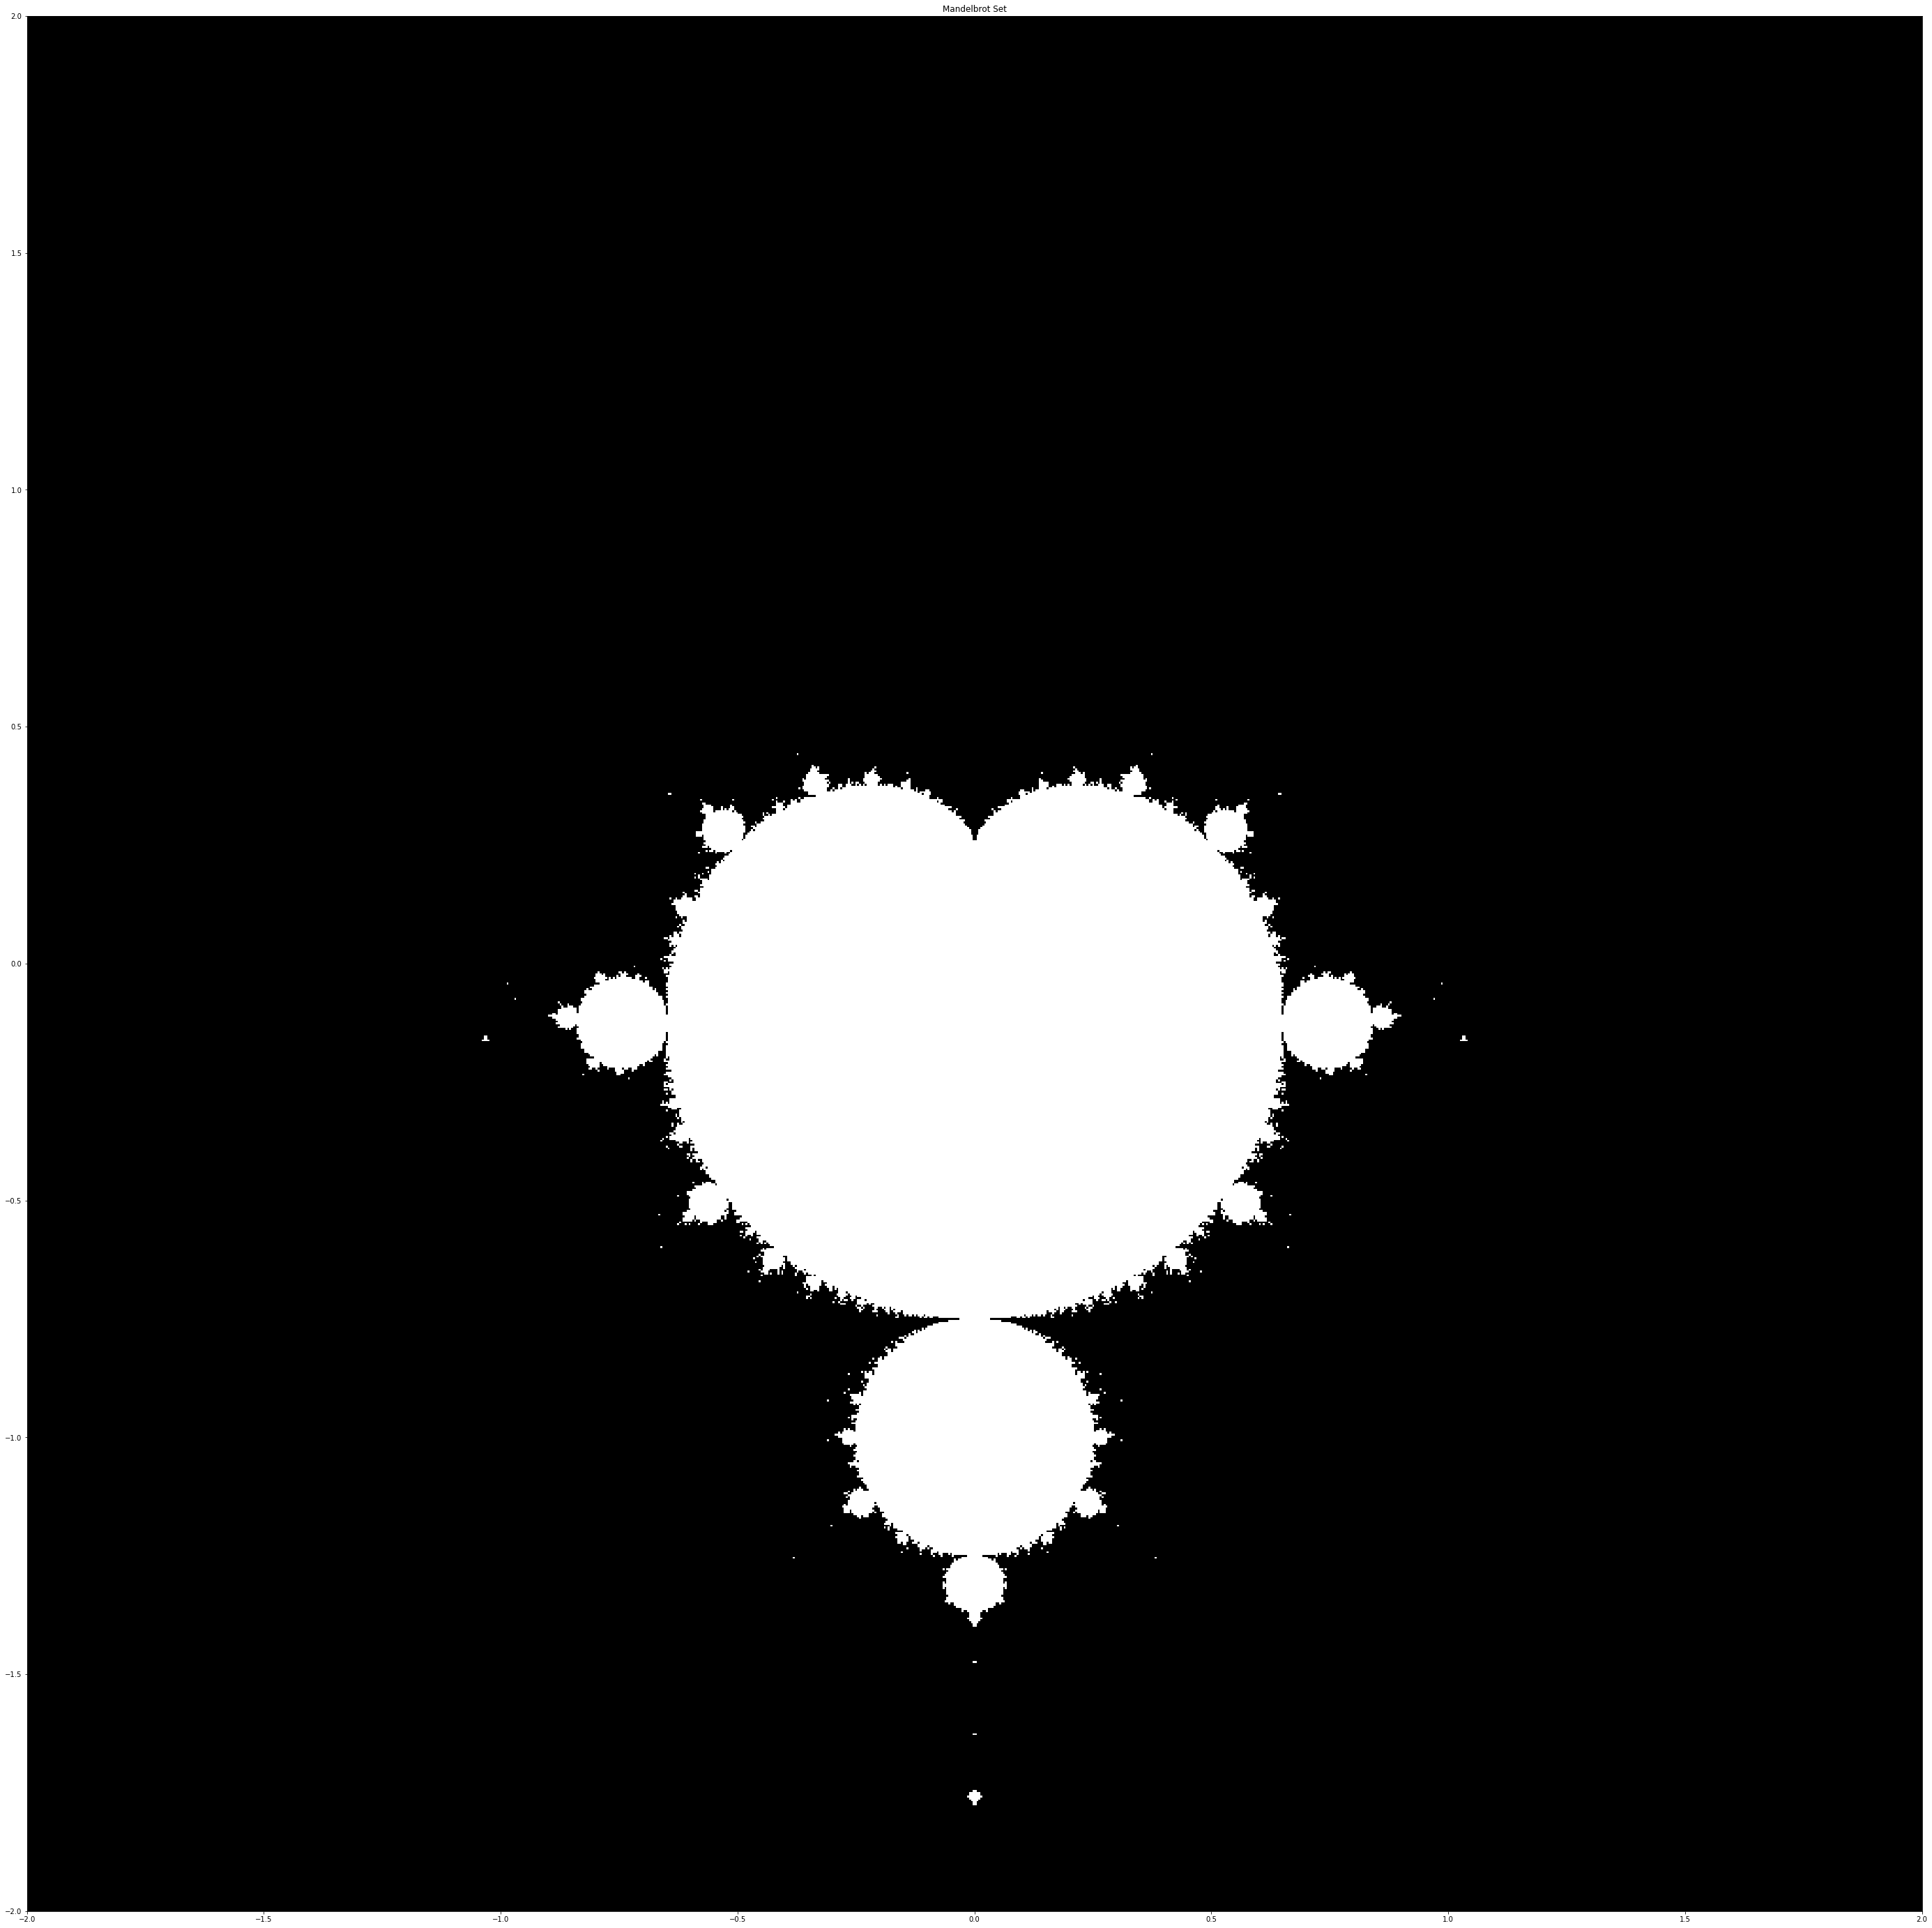

In [33]:
import math
import numpy as np
import pylab as plt

NUM_TESTS = 100
NUM_VALUES = 1000
MAX_VALUE = 2
DOMAIN = [-2, 2]
RANGE = [-2, 2]

GRAPH_SIZE = 50

def isInMandelbrotSet (complexConstant):
    bIsInSet = True
    z = 0**2 + complexConstant
    i = 0
    
    while bIsInSet and NUM_TESTS > i:
        bIsInSet = abs (z) <= MAX_VALUE
        z = z**2 + complexConstant
        i += 1
    
    return bIsInSet

if __name__ == "__main__":
    
    mandelbrotSet = np.zeros ((NUM_VALUES, NUM_VALUES), bool)
    xValues = np.linspace (DOMAIN[0], DOMAIN[1], NUM_VALUES)
    yValues = np.linspace (RANGE[0], RANGE[1], NUM_VALUES)
    
    for i in range (NUM_VALUES):
        for j in range (NUM_VALUES):
            mandelbrotSet[i][j] = isInMandelbrotSet (complex (xValues[i], yValues[j]))

    plt.figure (figsize = (GRAPH_SIZE, GRAPH_SIZE))
    plt.imshow (mandelbrotSet, origin="lower", extent=[DOMAIN[0], DOMAIN[1], RANGE[0], RANGE[1]])
    plt.title ("Mandelbrot Set")
    plt.gray ()
    plt.show()
    
